In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv("/content/employee_train.csv")
df

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,1044,8/29/2014 11:20,26,Male,United States,WA,No,No,Yes,Sometimes,...,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,NaN
1044,1045,8/29/2014 11:22,29,f,United Kingdom,NaN,No,No,Yes,Often,...,Don't know,Maybe,No,Some of them,No,No,Yes,No,Yes,NaN
1045,1046,8/29/2014 11:23,26,Female,Canada,NaN,No,Yes,Yes,Sometimes,...,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,NaN
1046,1047,8/29/2014 11:24,33,Malr,Italy,NaN,No,Yes,Yes,Sometimes,...,Somewhat easy,No,No,Some of them,Yes,No,No,Don't know,No,I suffered of panic attacks and agoraphobia fo...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       1048 non-null   int64 
 1   Timestamp                  1048 non-null   object
 2   Age                        1048 non-null   int64 
 3   Gender                     1048 non-null   object
 4   Country                    1048 non-null   object
 5   state                      636 non-null    object
 6   self_employed              1030 non-null   object
 7   family_history             1048 non-null   object
 8   treatment                  1048 non-null   object
 9   work_interfere             812 non-null    object
 10  no_employees               1048 non-null   object
 11  remote_work                1048 non-null   object
 12  tech_company               1048 non-null   object
 13  benefits                   1035 non-null   object
 14  care_opt

In [ ]:
df.isnull().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        412
self_employed                 18
family_history                 0
treatment                      0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                      13
care_options                   0
wellness_program               4
seek_help                      0
anonymity                      0
leave                          4
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     916
dtype: int64

In [ ]:
df.describe()

,S.No,Age
count,1048.000000,1.048000e+03
mean,524.500000,9.541988e+07
std,302.675844,3.089010e+09
min,1.000000,-1.726000e+03
25%,262.750000,2.700000e+01
50%,524.500000,3.100000e+01
75%,786.250000,3.600000e+01
max,1048.000000,1.000000e+11


In [ ]:
def data_prep(data):
     data['leave']=np.where(data['leave'].isna(),data['leave'].mode(dropna=True),data['leave'])
     data['self_employed']=np.where(data['self_employed'].isna(),data['self_employed'].mode(dropna=True),data['self_employed'])
     data['work_interfere']=np.where(data['work_interfere'].isna(),data['work_interfere'].mode(dropna=True),data['work_interfere'])
     data['benefits']=np.where(data['benefits'].isna(),data['benefits'].mode(dropna=True),data['benefits'])
     data['wellness_program']=np.where(data['wellness_program'].isna(),data['wellness_program'].mode(dropna=True),data['wellness_program'])

data_prep(df)

In [ ]:
df.drop(['S.No','Timestamp','comments','state','Country'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1048 non-null   int64 
 1   Gender                     1048 non-null   object
 2   self_employed              1048 non-null   object
 3   family_history             1048 non-null   object
 4   treatment                  1048 non-null   object
 5   work_interfere             1048 non-null   object
 6   no_employees               1048 non-null   object
 7   remote_work                1048 non-null   object
 8   tech_company               1048 non-null   object
 9   benefits                   1048 non-null   object
 10  care_options               1048 non-null   object
 11  wellness_program           1048 non-null   object
 12  seek_help                  1048 non-null   object
 13  anonymity                  1048 non-null   object
 14  leave   

In [ ]:
 df.skew()

<ipython-input-129-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Age    32.372828
dtype: float64

<Axes: >

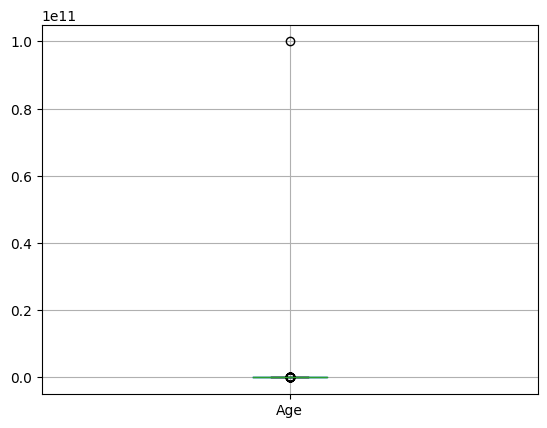

In [ ]:
df.boxplot()

In [ ]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,25-Jun,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,25-Jun,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,26,Male,No,No,Yes,Sometimes,25-Jun,No,Yes,Yes,...,Yes,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No
1044,29,f,No,No,Yes,Often,More than 1000,No,No,Yes,...,Don't know,Don't know,Maybe,No,Some of them,No,No,Yes,No,Yes
1045,26,Female,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,...,Yes,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No
1046,33,Malr,No,Yes,Yes,Sometimes,25-Jun,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Yes,No,No,Don't know,No


In [ ]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

In [ ]:
df['Gender'].value_counts()

Male      827
Female    202
Other      19
Name: Gender, dtype: int64

No     536
Yes    512
Name: treatment, dtype: int64

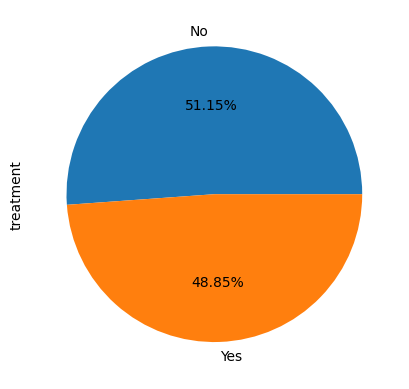

In [ ]:
df['treatment'].value_counts().plot(kind='pie',autopct='%1.2f%%')
df['treatment'].value_counts()

In [ ]:
 df.corr()

<ipython-input-135-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age
Age,1.0


In [ ]:
def encode(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=="object":
      data[i]=le.fit_transform(data[i])
  return data

In [ ]:
encode(df)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,0,1,1,1,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,44,1,0,0,0,2,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,0,0,0,2,1,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,0,1,1,1,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,0,0,0,0,0,1,1,2,...,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,26,1,0,0,1,3,1,0,1,2,...,2,0,0,1,1,0,1,0,0,0
1044,29,0,0,0,1,1,5,0,0,2,...,0,0,0,1,1,0,1,2,1,1
1045,26,0,0,1,1,3,0,0,1,2,...,2,0,0,1,1,0,1,0,0,0
1046,33,1,0,1,1,3,1,0,1,1,...,0,2,1,1,1,2,1,1,0,0


In [ ]:
 x=df.drop(['treatment'],axis=1)
 y=df['treatment']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=162)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1048 non-null   int64
 1   Gender                     1048 non-null   int64
 2   self_employed              1048 non-null   int64
 3   family_history             1048 non-null   int64
 4   treatment                  1048 non-null   int64
 5   work_interfere             1048 non-null   int64
 6   no_employees               1048 non-null   int64
 7   remote_work                1048 non-null   int64
 8   tech_company               1048 non-null   int64
 9   benefits                   1048 non-null   int64
 10  care_options               1048 non-null   int64
 11  wellness_program           1048 non-null   int64
 12  seek_help                  1048 non-null   int64
 13  anonymity                  1048 non-null   int64
 14  leave                   

In [ ]:

lr=LogisticRegression()
lr.fit(x_train,y_train)
preds_ytrain_lr=lr.predict(x_train)
preds_ytest_lr=lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def acc_report(actual,predicted):
   acc_score=accuracy_score(actual,predicted)
   cn_matrix=confusion_matrix(actual,predicted)
   cla_report=classification_report(actual,predicted)
   print('accuracy::',acc_score.round(2))
   print(cn_matrix)
   print(cla_report)
acc_report(y_test,preds_ytest_lr)
print("::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::")
acc_report(y_train,preds_ytrain_lr)

accuracy:: 0.65
[[69 41]
 [32 68]]
              precision    recall  f1-score   support

           0       0.68      0.63      0.65       110
           1       0.62      0.68      0.65       100

    accuracy                           0.65       210
   macro avg       0.65      0.65      0.65       210
weighted avg       0.65      0.65      0.65       210

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
accuracy:: 0.74
[[329  97]
 [119 293]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       426
           1       0.75      0.71      0.73       412

    accuracy                           0.74       838
   macro avg       0.74      0.74      0.74       838
weighted avg       0.74      0.74      0.74       838



In [ ]:
dtc=DecisionTreeClassifier(max_depth=5,min_samples_split=4)
dtc.fit(x_train,y_train)
preds_ytrain_dtc=dtc.predict(x_train)
preds_ytest_dtc=dtc.predict(x_test)
acc_report(y_train,preds_ytrain_dtc)
acc_report(y_test,preds_ytest_dtc)

accuracy:: 0.78
[[361  65]
 [119 293]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       426
           1       0.82      0.71      0.76       412

    accuracy                           0.78       838
   macro avg       0.79      0.78      0.78       838
weighted avg       0.78      0.78      0.78       838

accuracy:: 0.69
[[81 29]
 [36 64]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       110
           1       0.69      0.64      0.66       100

    accuracy                           0.69       210
   macro avg       0.69      0.69      0.69       210
weighted avg       0.69      0.69      0.69       210



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(verbose=1)
rf.fit(x_train,y_train)
preds_rf_train=rf.predict(x_train)
preds_rf_test=rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
acc_report(y_train,preds_rf_train)
acc_report(y_test,preds_rf_test)

accuracy:: 1.0
[[426   0]
 [  0 412]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       426
           1       1.00      1.00      1.00       412

    accuracy                           1.00       838
   macro avg       1.00      1.00      1.00       838
weighted avg       1.00      1.00      1.00       838

accuracy:: 0.71
[[77 33]
 [28 72]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.72       110
           1       0.69      0.72      0.70       100

    accuracy                           0.71       210
   macro avg       0.71      0.71      0.71       210
weighted avg       0.71      0.71      0.71       210



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
preds_gb_train=gb.predict(x_train)
preds_gb_test=gb.predict(x_test)
acc_report(y_train,preds_gb_train)
acc_report(y_test,preds_gb_test)

accuracy:: 0.85
[[366  60]
 [ 67 345]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       426
           1       0.85      0.84      0.84       412

    accuracy                           0.85       838
   macro avg       0.85      0.85      0.85       838
weighted avg       0.85      0.85      0.85       838

accuracy:: 0.69
[[74 36]
 [30 70]]
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       110
           1       0.66      0.70      0.68       100

    accuracy                           0.69       210
   macro avg       0.69      0.69      0.69       210
weighted avg       0.69      0.69      0.69       210



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=33)
knn.fit(x_train,y_train)
preds_ytrain_knn=knn.predict(x_train)
preds_ytest_knn=knn.predict(x_test)
acc_report(y_train,preds_ytrain_knn)

accuracy:: 0.67
[[299 127]
 [153 259]]
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       426
           1       0.67      0.63      0.65       412

    accuracy                           0.67       838
   macro avg       0.67      0.67      0.67       838
weighted avg       0.67      0.67      0.67       838



In [ ]:
acc_report(y_test,preds_ytest_knn)

accuracy:: 0.56
[[62 48]
 [45 55]]
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       110
           1       0.53      0.55      0.54       100

    accuracy                           0.56       210
   macro avg       0.56      0.56      0.56       210
weighted avg       0.56      0.56      0.56       210



In [ ]:
ada=AdaBoostClassifier(n_estimators=200,learning_rate=0.9623)
ada.fit(x_train,y_train)
preds_ada_train=ada.predict(x_train)
preds_ada_test=ada.predict(x_test)
acc_report(y_train,preds_ada_train)
acc_report(y_test,preds_ada_test)

accuracy:: 0.78
[[335  91]
 [ 92 320]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       426
           1       0.78      0.78      0.78       412

    accuracy                           0.78       838
   macro avg       0.78      0.78      0.78       838
weighted avg       0.78      0.78      0.78       838

accuracy:: 0.68
[[74 36]
 [32 68]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       110
           1       0.65      0.68      0.67       100

    accuracy                           0.68       210
   macro avg       0.68      0.68      0.68       210
weighted avg       0.68      0.68      0.68       210



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)
scalar=StandardScaler()
x_train_scal=scalar.fit_transform(x_train)
x_test_scal=scalar.fit_transform(x_test)

In [ ]:
lr=LogisticRegression()
lr.fit(x_train_scal,y_train)
preds_ytrain_lr=lr.predict(x_train_scal)
preds_ytest_lr=lr.predict(x_test_scal)

In [ ]:
def acc_report(actual,predicted):
   acc_score=accuracy_score(actual,predicted)
   cn_matrix=confusion_matrix(actual,predicted)
   cla_report=classification_report(actual,predicted)
   print('accuracy::',acc_score.round(2))
   print(cn_matrix)
   print(cla_report)

In [ ]:
acc_report(y_train,preds_ytrain_lr)
acc_report(y_test,preds_ytest_lr)

accuracy:: 0.74
[[340  92]
 [124 282]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       432
           1       0.75      0.69      0.72       406

    accuracy                           0.74       838
   macro avg       0.74      0.74      0.74       838
weighted avg       0.74      0.74      0.74       838

accuracy:: 0.66
[[73 31]
 [41 65]]
              precision    recall  f1-score   support

           0       0.64      0.70      0.67       104
           1       0.68      0.61      0.64       106

    accuracy                           0.66       210
   macro avg       0.66      0.66      0.66       210
weighted avg       0.66      0.66      0.66       210



In [ ]:
 dtc=DecisionTreeClassifier(max_depth=2,min_samples_split=4)
dtc.fit(x_train_scal,y_train)
preds_ytrain_dtc=dtc.predict(x_train_scal)
preds_ytest_dtc=dtc.predict(x_test_scal)

In [ ]:
acc_report(y_train,preds_ytrain_dtc)
acc_report(y_test,preds_ytest_dtc)

accuracy:: 0.73
[[294 138]
 [ 92 314]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       432
           1       0.69      0.77      0.73       406

    accuracy                           0.73       838
   macro avg       0.73      0.73      0.73       838
weighted avg       0.73      0.73      0.73       838

accuracy:: 0.69
[[66 38]
 [28 78]]
              precision    recall  f1-score   support

           0       0.70      0.63      0.67       104
           1       0.67      0.74      0.70       106

    accuracy                           0.69       210
   macro avg       0.69      0.69      0.68       210
weighted avg       0.69      0.69      0.68       210



In [ ]:
rf= RandomForestClassifier(n_estimators=200,max_depth=60 ,verbose=1)
rf.fit(x_train_scal,y_train)
preds_rf_train=rf.predict(x_train_scal)
preds_rf_test=rf.predict(x_test_scal)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [ ]:
acc_report(y_train,preds_rf_train)
acc_report(y_test,preds_rf_test)

accuracy:: 1.0
[[432   0]
 [  0 406]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       432
           1       1.00      1.00      1.00       406

    accuracy                           1.00       838
   macro avg       1.00      1.00      1.00       838
weighted avg       1.00      1.00      1.00       838

accuracy:: 0.71
[[77 27]
 [33 73]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       104
           1       0.73      0.69      0.71       106

    accuracy                           0.71       210
   macro avg       0.71      0.71      0.71       210
weighted avg       0.72      0.71      0.71       210



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(x_train_scal,y_train)
preds_gb_train=gb.predict(x_train_scal)
preds_gb_test=gb.predict(x_test_scal)
acc_report(y_train,preds_gb_train)
acc_report(y_test,preds_gb_test)

accuracy:: 0.85
[[377  55]
 [ 74 332]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       432
           1       0.86      0.82      0.84       406

    accuracy                           0.85       838
   macro avg       0.85      0.85      0.85       838
weighted avg       0.85      0.85      0.85       838

accuracy:: 0.71
[[79 25]
 [35 71]]
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       104
           1       0.74      0.67      0.70       106

    accuracy                           0.71       210
   macro avg       0.72      0.71      0.71       210
weighted avg       0.72      0.71      0.71       210



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=33)
knn.fit(x_train_scal,y_train)
preds_ytrain_knn=knn.predict(x_train_scal)
preds_ytest_knn=knn.predict(x_test_scal)
acc_report(y_train,preds_ytrain_knn)
acc_report(y_test,preds_ytest_knn)

accuracy:: 0.73
[[360  72]
 [154 252]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       432
           1       0.78      0.62      0.69       406

    accuracy                           0.73       838
   macro avg       0.74      0.73      0.73       838
weighted avg       0.74      0.73      0.73       838

accuracy:: 0.66
[[84 20]
 [51 55]]
              precision    recall  f1-score   support

           0       0.62      0.81      0.70       104
           1       0.73      0.52      0.61       106

    accuracy                           0.66       210
   macro avg       0.68      0.66      0.66       210
weighted avg       0.68      0.66      0.65       210



In [ ]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.9623)
ada.fit(x_train_scal,y_train)
preds_ada_train=ada.predict(x_train_scal)
preds_ada_test=ada.predict(x_test_scal)
acc_report(y_train,preds_ada_train)
acc_report(y_test,preds_ada_test)

accuracy:: 0.76
[[339  93]
 [108 298]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       432
           1       0.76      0.73      0.75       406

    accuracy                           0.76       838
   macro avg       0.76      0.76      0.76       838
weighted avg       0.76      0.76      0.76       838

accuracy:: 0.72
[[79 25]
 [33 73]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       104
           1       0.74      0.69      0.72       106

    accuracy                           0.72       210
   macro avg       0.73      0.72      0.72       210
weighted avg       0.73      0.72      0.72       210



In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='poly',degree=3)
svc.fit(x_train_scal,y_train)
svc_preds_train=svc.predict(x_train_scal)
svc_preds_test=svc.predict(x_test_scal)

In [ ]:
acc_report(y_train,svc_preds_train)
acc_report(y_test,svc_preds_test)

accuracy:: 0.87
[[402  30]
 [ 82 324]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       432
           1       0.92      0.80      0.85       406

    accuracy                           0.87       838
   macro avg       0.87      0.86      0.87       838
weighted avg       0.87      0.87      0.87       838

accuracy:: 0.64
[[80 24]
 [52 54]]
              precision    recall  f1-score   support

           0       0.61      0.77      0.68       104
           1       0.69      0.51      0.59       106

    accuracy                           0.64       210
   macro avg       0.65      0.64      0.63       210
weighted avg       0.65      0.64      0.63       210



In [ ]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [ ]:
gb_preds_train=gb.predict(x_train)
gb_preds_test=gb.predict(x_test)
acc_report(y_train,gb_preds_train)
acc_report(y_test,gb_preds_test)

accuracy:: 0.52
[[432   0]
 [405   1]]
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       432
           1       1.00      0.00      0.00       406

    accuracy                           0.52       838
   macro avg       0.76      0.50      0.34       838
weighted avg       0.75      0.52      0.35       838

accuracy:: 0.5
[[104   0]
 [106   0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.66       104
           1       0.00      0.00      0.00       106

    accuracy                           0.50       210
   macro avg       0.25      0.50      0.33       210
weighted avg       0.25      0.50      0.33       210



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test=pd.read_csv('/content/employee_test.csv')


In [ ]:
da

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       210 non-null    int64 
 1   Timestamp                  210 non-null    object
 2   Age                        210 non-null    int64 
 3   Gender                     210 non-null    object
 4   Country                    210 non-null    object
 5   state                      107 non-null    object
 6   self_employed              210 non-null    object
 7   family_history             210 non-null    object
 8   work_interfere             182 non-null    object
 9   no_employees               210 non-null    object
 10  remote_work                210 non-null    object
 11  tech_company               210 non-null    object
 12  benefits                   207 non-null    object
 13  care_options               210 non-null    object
 14  wellness_p

In [ ]:
data_prep(test)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       210 non-null    int64 
 1   Timestamp                  210 non-null    object
 2   Age                        210 non-null    int64 
 3   Gender                     210 non-null    object
 4   Country                    210 non-null    object
 5   state                      107 non-null    object
 6   self_employed              210 non-null    object
 7   family_history             210 non-null    object
 8   work_interfere             210 non-null    object
 9   no_employees               210 non-null    object
 10  remote_work                210 non-null    object
 11  tech_company               210 non-null    object
 12  benefits                   210 non-null    object
 13  care_options               210 non-null    object
 14  wellness_p

In [ ]:
test.drop(['Country','state','comments'],axis=1,inplace=True)

In [ ]:
test.drop(['S.No','Timestamp'],axis=1,inplace=True)

In [ ]:
encode(test)

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,39,4,1,1,3,3,1,1,1,2,...,2,1,1,1,2,2,1,0,2,1
1,26,9,0,1,3,5,0,1,2,2,...,0,0,1,1,1,2,1,0,1,1
2,23,2,0,1,3,2,0,0,1,0,...,0,1,2,1,0,1,1,0,1,0
3,35,4,0,1,1,5,0,1,0,1,...,2,4,1,1,1,1,1,0,1,0
4,36,4,0,0,0,3,1,1,0,1,...,0,4,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,26,11,0,0,3,2,0,1,1,0,...,0,2,1,1,1,1,1,1,0,0
206,32,4,0,1,1,2,1,1,2,2,...,2,1,1,1,1,2,1,1,2,0
207,34,11,0,1,3,5,0,1,2,2,...,0,1,2,2,0,0,1,1,1,0
208,46,7,0,0,3,0,1,1,1,2,...,0,0,2,1,0,0,1,1,1,0


In [ ]:
preds_ytest_rf = rf.predict(test)
preds_ytest_rf

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
test_gb=gb.predict(test)
test_gb

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
output = pd.DataFrame({
    'S.No' : range(1, 211),
    'treatment':[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
})

In [ ]:
output

,S.No,treatment
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
205,206,0
206,207,1
207,208,1
208,209,1


In [ ]:
output.to_csv('employee.csv')